In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn

### Had to move file to correct directory

In [6]:
import os
print(os.getcwd())


C:\Users\Miles


## Sample of Data Shown

In [7]:
data = pd.read_csv('train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
print('# of passengers:' + str(len(data.index)))

# of passengers:891


# Analyzing Data

<Axes: xlabel='Survived', ylabel='count'>

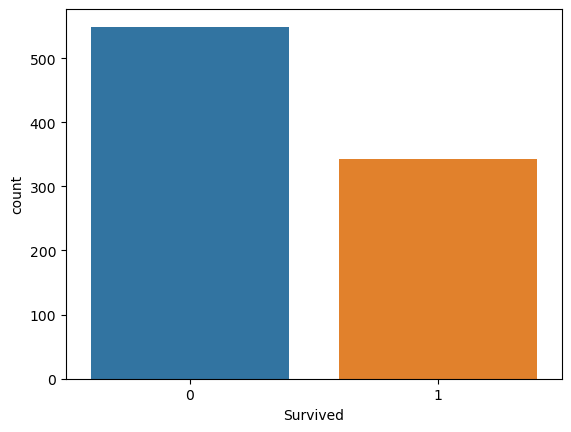

In [9]:
sns.countplot(x='Survived',data = data)

<Axes: xlabel='Sex', ylabel='count'>

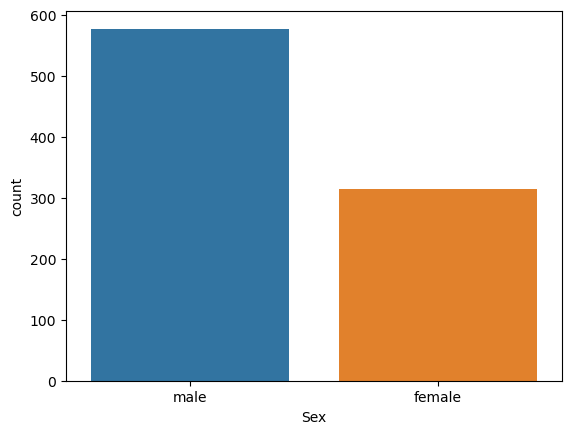

In [10]:
sns.countplot(x= 'Sex',data = data)

<Axes: xlabel='Survived', ylabel='count'>

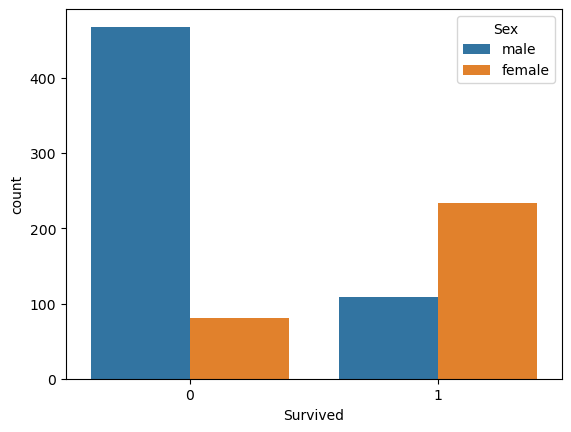

In [11]:
sns.countplot(x= 'Survived', hue='Sex',data = data)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

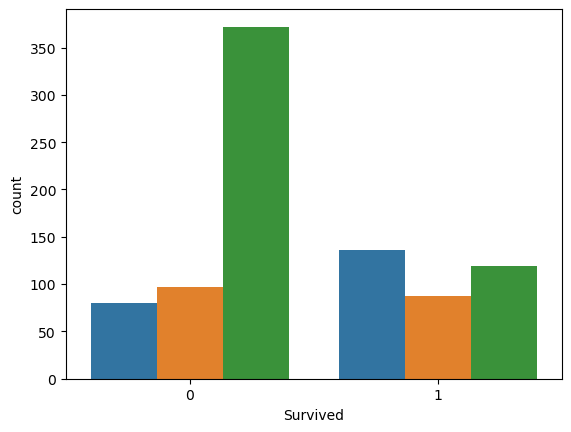

In [14]:
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.legend(title='Passenger Class')
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

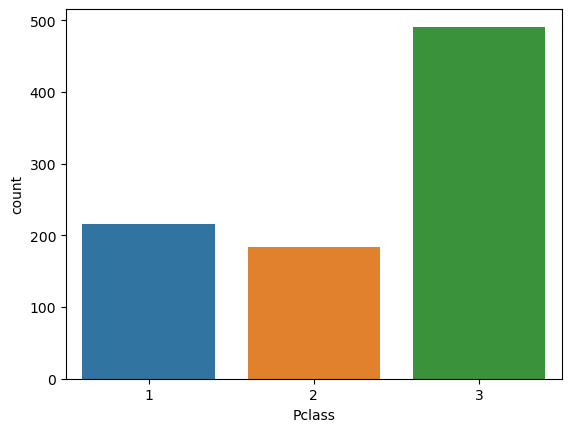

In [15]:
sns.countplot(x= 'Pclass',data = data)

<Axes: ylabel='Frequency'>

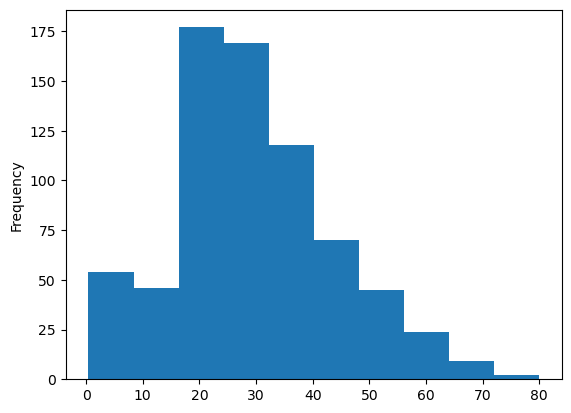

In [16]:
data['Age'].plot.hist()

# Available Info

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleaning

In [18]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

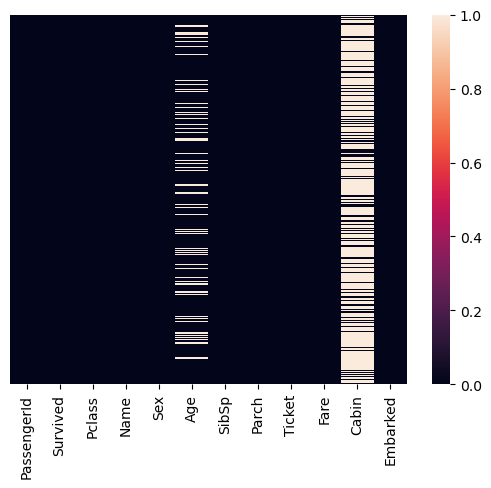

In [21]:
sns.heatmap(data.isnull(), yticklabels=False)

## Removing Mostly null Column

In [22]:
data.drop('Cabin', axis=1, inplace= True)

In [23]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Removing 'NA' Values

In [24]:
data.dropna(inplace=True)

<Axes: >

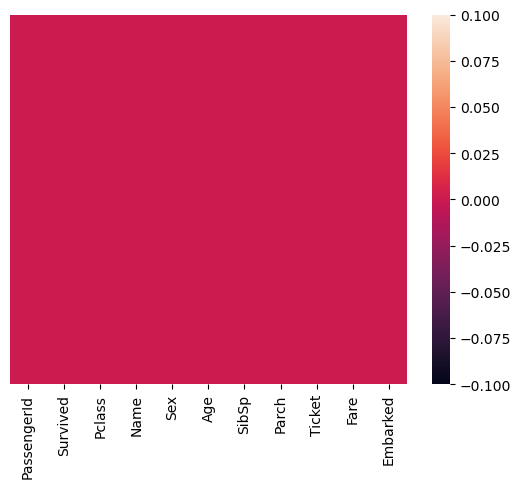

In [25]:
sns.heatmap(data.isnull(), yticklabels=False)

In [26]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Converting to Categorical Values

In [27]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [39]:
sex= pd.get_dummies(data['Sex'], drop_first=True).astype(int)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [42]:
embark=pd.get_dummies(data['Embarked'], drop_first=True).astype(int)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [43]:
Pclass=pd.get_dummies(data['Pclass'], drop_first=True).astype(int)
Pclass.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [44]:
data=pd.concat([data,sex,embark,Pclass], axis=1)
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [45]:
data.drop(['Sex', 'Embarked','PassengerId','Name', 'Ticket', 'Pclass'],axis=1, inplace=True)
data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Train Data

In [53]:
X= data.drop('Survived', axis=1)
y= data['Survived']

In [49]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression

In [63]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train.values, y_train.values)
predictions = logmodel.predict(X_test.values)
print(predictions)

[1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0
 1 1 0 1 0 1 1 0 0 1 1 0 1]


In [66]:
from sklearn.metrics import classification_report
classification_report(y_test.values, predictions)

'              precision    recall  f1-score   support\n\n           0       0.79      0.82      0.81       136\n           1       0.74      0.71      0.73        99\n\n    accuracy                           0.77       235\n   macro avg       0.77      0.77      0.77       235\nweighted avg       0.77      0.77      0.77       235\n'

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y_test.values, predictions)

0.774468085106383